# Ciencia de Datos - TP5

## Integrantes

- Ambroa, Nicolás - 229/13 - ambroanicolas@hotmail.com
- Gaustein, Diego - 586/09 - diego@gaustein.com.ar

## 1) Implementación
Implemente el modelo en pymc3 para los priors $Beta(1,1)$ y $Beta(100,100)$, y grafique las posteriors
resultantes de observar 6 caras de 6 tiradas.

Por un error numérico no se puede realizar la simulación de $Beta(100,100)$ por lo que lo reemplazamos por $Beta(50,50)$ que es suficientemente equivalente.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:00<00:00, 1524.90it/s]


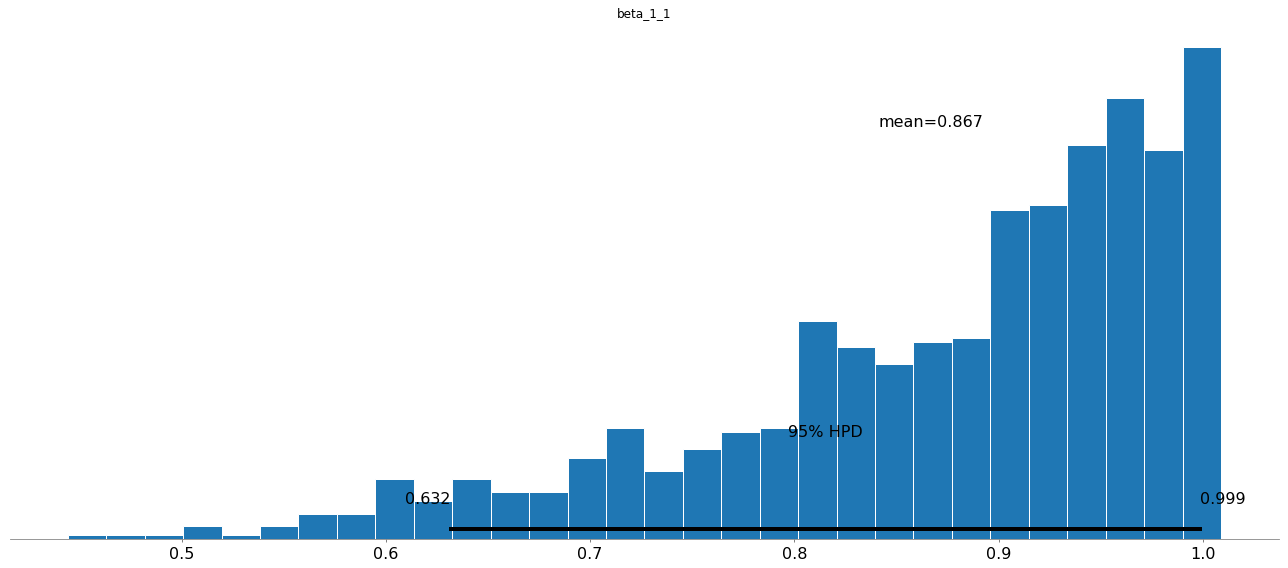

In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import beta
%matplotlib inline
plt.rcParams["figure.figsize"] = (18, 8)
random.seed(42)

# Cálculos para Beta (1,1)
model_beta_1_1 = pm.Model()
with model_beta_1_1:
    beta_1_1 = pm.Beta('beta_1_1', 1, 1)
    likelihood = pm.Binomial('likelihood', n=6, p=beta_1_1, observed=6) # Binomial con #tiradas, prior y #exitos.
    trace = pm.sample(1000, random_seed=123)
    pm.plot_posterior(trace)

    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:01<00:00, 1422.11it/s]


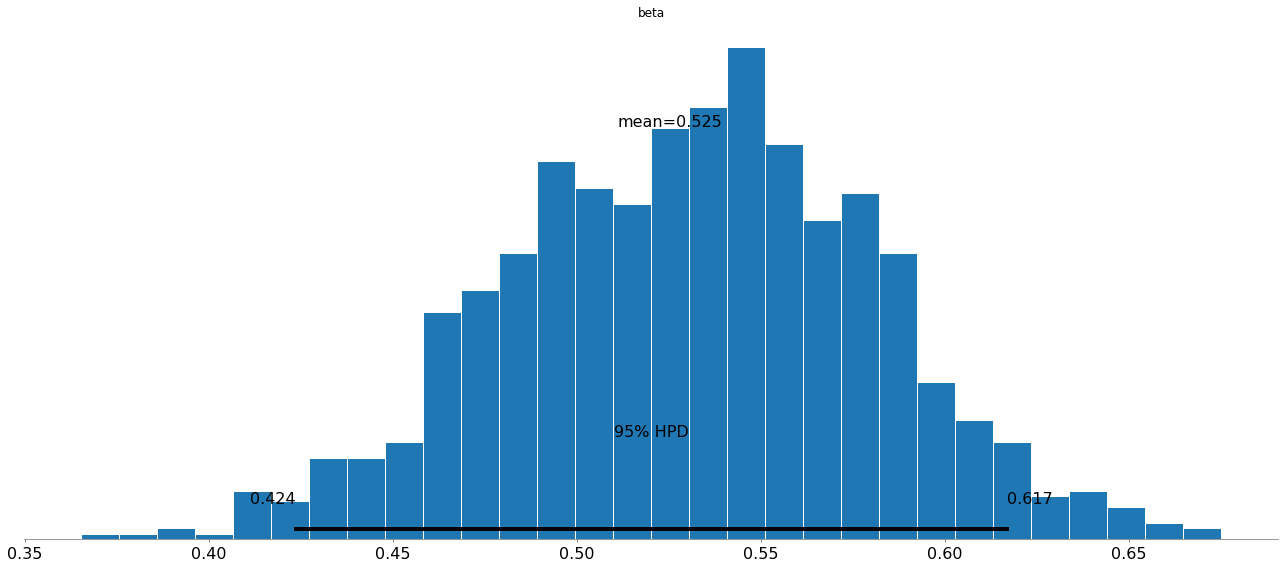

In [2]:
model_beta_50_50 = pm.Model()
with model_beta_50_50:
    beta = pm.Beta('beta', alpha=50, beta=50)
    likelihood = pm.Binomial('likelihood', n=6, p=beta, observed=6) # Binomial con #tiradas, prior y #exitos
    trace = pm.sample(1000, progressbar=True, random_seed=123)
    pm.plot_posterior(trace)

## 2. Resúmenes
Calcule el MAP (máximo a posteriori) y las medias de ambas posteriors.

In [3]:
# Cálculos para Beta(1,1)
with model_beta_1_1:
    MAP = pm.find_MAP()
    trace = pm.sample(1000, progressbar=True, random_seed=123)
    print("El MAP y la media del modelo Beta(1,1) son: {}, {}".format(MAP['beta_1_1'], np.mean(trace['beta_1_1'])))

# Cálculos para Beta(50,50)
with model_beta_50_50:
    MAP = pm.find_MAP()
    trace = pm.sample(1000, progressbar=True, random_seed=123)
    print("El MAP y la media del modelo Beta(50,50) son: {}, {}".format(MAP['beta'], np.mean(trace['beta'])))


logp = -0.0023631, ||grad|| = 0.0023627: 100%|██████████| 20/20 [00:00<00:00, 1717.85it/s]  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:00<00:00, 1502.01it/s]


El MAP y la media del modelo Beta(1,1) son: 0.9999984620831801, 0.8793218161776775


logp = -2.0846, ||grad|| = 3: 100%|██████████| 6/6 [00:00<00:00, 959.50it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:01<00:00, 1462.84it/s]

El MAP y la media del modelo Beta(50,50) son: 0.5288461537406147, 0.5321053395059646


## 3) Predicción

Prediga, para ambos priors, el resultado de una nueva tirada de moneda.

In [4]:
# Predicción para la #de caras de nuevos experimientos.

# Cálculos para Beta(1,1)
with model_beta_1_1:
    trace = pm.sample(1000, progressbar=True, random_seed=123)
    ppc = pm.sample_ppc(trace, samples=1, model=model_beta_1_1, size=1) # Genera un nuevo experimento (6 Tiradas)
    print(ppc['likelihood'][0])

# Cálculos para Beta(50,50)
with model_beta_50_50:
    trace = pm.sample(1000, progressbar=True, random_seed=123)
    ppc = pm.sample_ppc(trace, samples=1, model=model_beta_50_50, size=1) # Genera un nuevo experimento (6 Tiradas)
    print(ppc['likelihood'][0])


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1/1 [00:00<00:00, 886.18it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


[6]


100%|██████████| 1/1 [00:00<00:00, 734.30it/s]

[4]


## 4) Otros datos
Repita los puntos anteriores para una situación en la que se observan 20 caras de 20 tiradas, y otra en
la que se observan 3 caras de 3 tiradas. ¿Qué puede concluir de los priors elegidos? ¿Y del modelo en
general?

### 4) Punto 1) para ambos experimentos

In [5]:
# Cálculos para Beta(1,1)

def model_and_trace(alpha_beta, n):
    nombre = 'Beta ({0}, {0}) con {1} tiradas'.format(alpha_beta, n)
    model = pm.Model(nombre)
    with model:
        beta = pm.Beta('beta', alpha_beta, alpha_beta)
        likelihood = pm.Binomial('likelihood', n=n, p=beta, observed=n)
        trace = pm.sample(1000, progressbar=True, random_seed=123)
    return model, trace
        
def map_and_mean(model, trace):
    with model:
        MAP = pm.find_MAP()
        print("El MAP y la media del modelo {} son: {}, {}".format(model.name, MAP[model.name+'_beta'], np.mean(trace[model.name+'_beta'])))
        
def predict_sample(model, trace, sample_size):
    with model:
        ppc = pm.sample_ppc(trace, samples=1, model=model, size=sample_size, random_seed=123) # Genera un nuevo experimento (6 Tiradas)
        name = model.name+'_likelihood'
        print("El sample predicho para el modelo {} resulta: {}".format(model.name, ppc[name][0][0]))
    return ppc

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:00<00:00, 1568.24it/s]


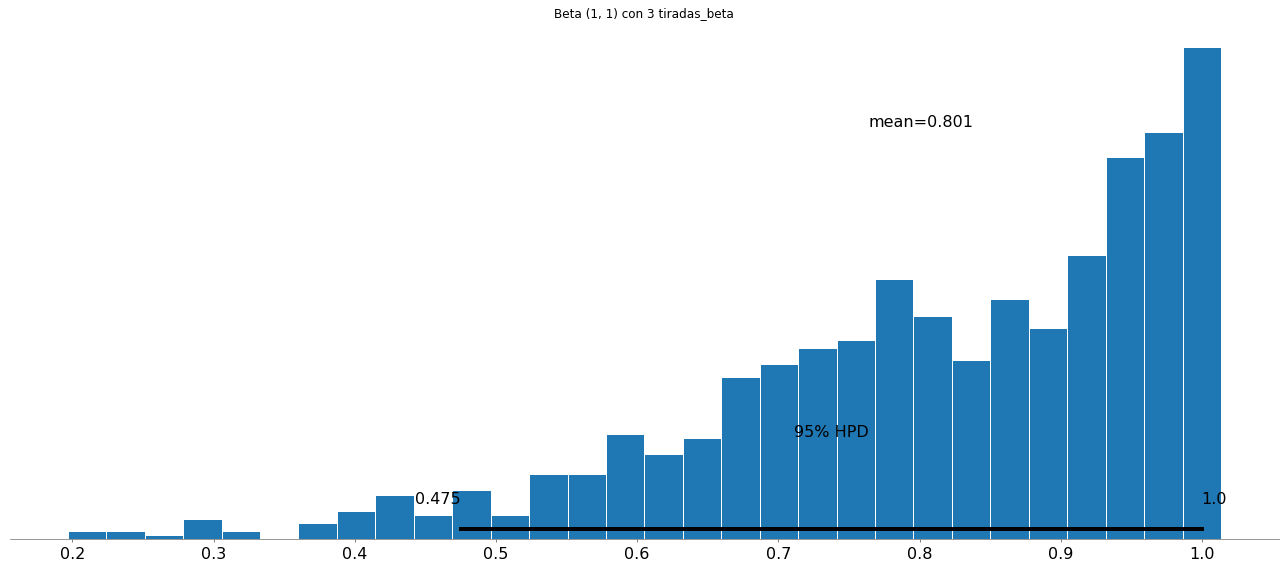

In [6]:
# 3 caras de 3 tiradas
b1_model_3_3, b1_trace_3_3 = model_and_trace(1, 3)
with b1_model_3_3:
    pm.plot_posterior(b1_trace_3_3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 97%|█████████▋| 1451/1500 [00:01<00:00, 1265.65it/s]/usr/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.896582803857, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 1500/1500 [00:01<00:00, 1265.21it/s]


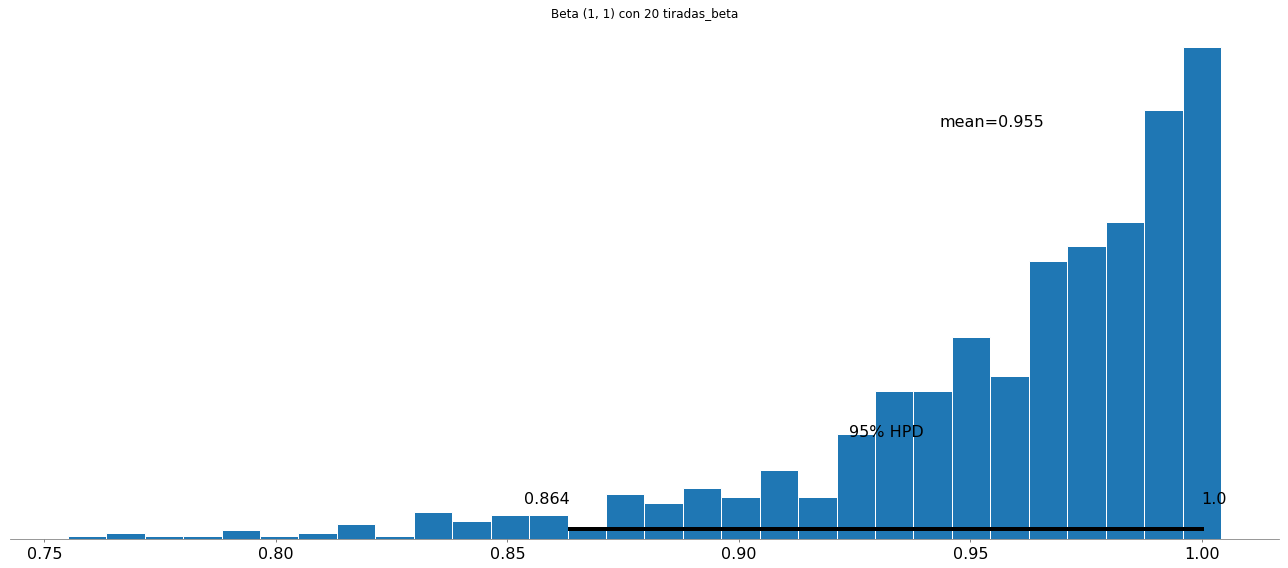

In [7]:
# 20 caras de 20 tiradas
b1_model_20_20, b1_trace_20_20 = model_and_trace(1, 20)
with b1_model_20_20:
    pm.plot_posterior(b1_trace_20_20)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:00<00:00, 1557.33it/s]


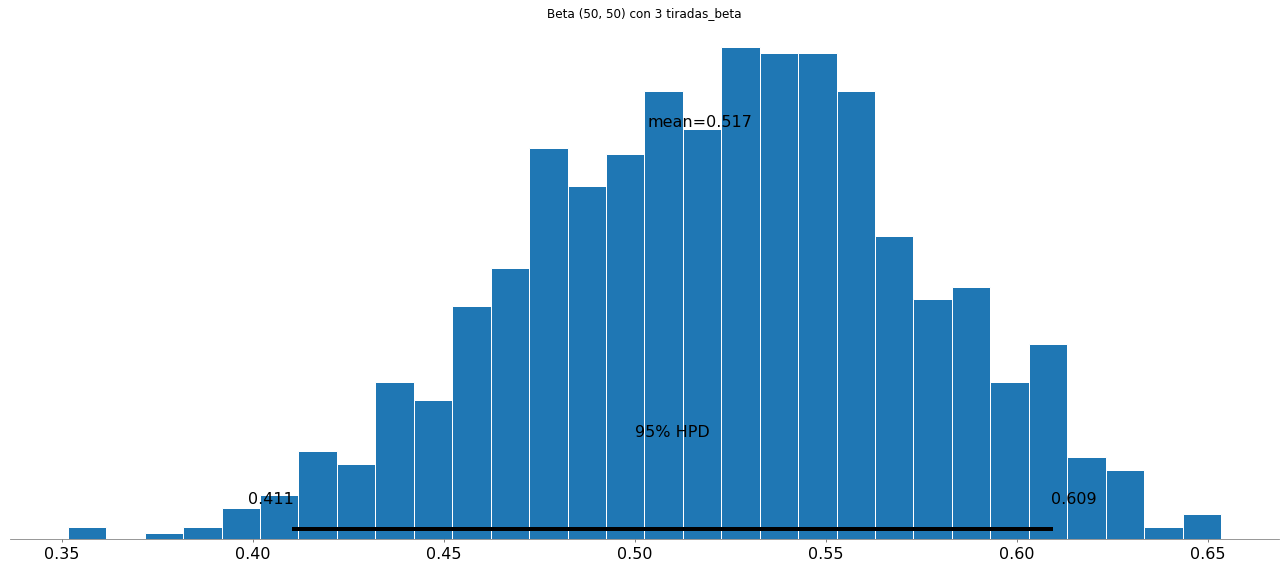

In [8]:
# Cálculos para Beta(50,50)

# 3 caras de 3 tiradas
b50_model_3_3, b50_trace_3_3 = model_and_trace(50, 3)
with b50_model_3_3:
    pm.plot_posterior(b50_trace_3_3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:01<00:00, 1492.17it/s]


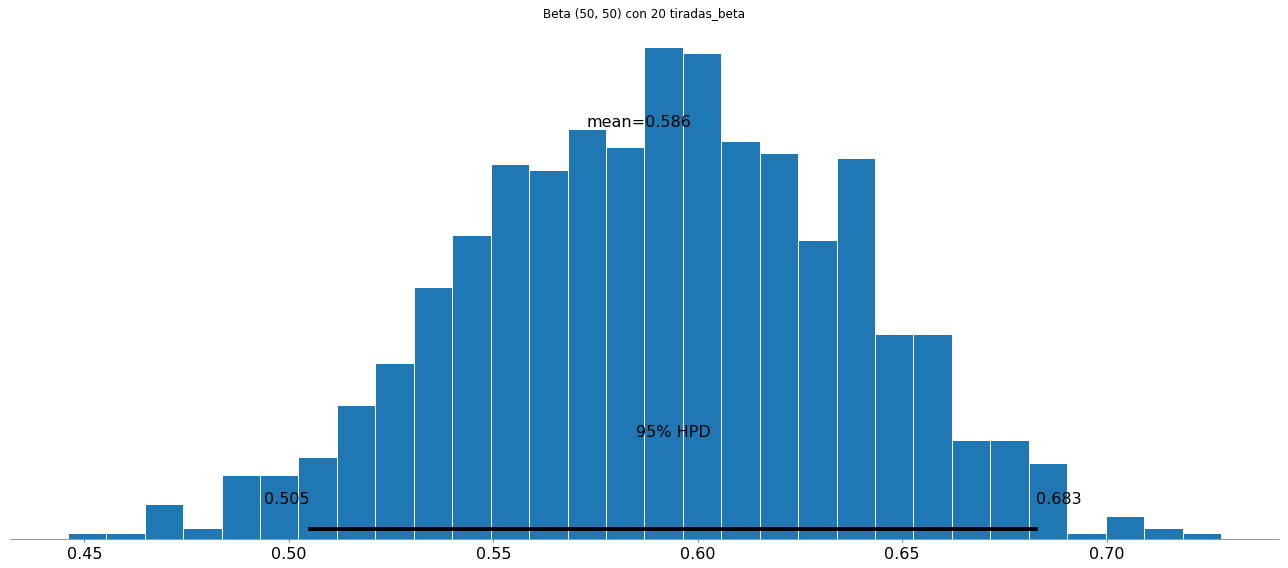

In [9]:
# 20 caras de 20 tiradas
b50_model_20_20, b50_trace_20_20 = model_and_trace(50, 20)
with b50_model_20_20:
    pm.plot_posterior(b50_trace_20_20)

### Punto 2) para ambos experimentos

In [10]:
# Cálculos para Beta(1,1)
map_and_mean(b1_model_20_20, b1_trace_20_20)
map_and_mean(b1_model_3_3, b1_trace_3_3)

# Cálculos para Beta(100,100)
map_and_mean(b50_model_20_20, b50_trace_20_20)
map_and_mean(b50_model_3_3, b50_trace_3_3)

logp = -7.0849e-06, ||grad|| = 7.6896e-06: 100%|██████████| 22/22 [00:00<00:00, 1344.13it/s]  


El MAP y la media del modelo Beta (1, 1) con 20 tiradas son: 0.9999996155210419, 0.9547054640048863


logp = -0.0011816, ||grad|| = 0.0011814: 100%|██████████| 19/19 [00:00<00:00, 1591.83it/s]  


El MAP y la media del modelo Beta (1, 1) con 3 tiradas son: 0.999996924163579, 0.8012672154368259


logp = -11.789, ||grad|| = 10: 100%|██████████| 6/6 [00:00<00:00, 944.20it/s]


El MAP y la media del modelo Beta (50, 50) con 20 tiradas son: 0.5847457607428355, 0.5856423552623394


logp = -0.0051492, ||grad|| = 1.5: 100%|██████████| 6/6 [00:00<00:00, 1247.75it/s]

El MAP y la media del modelo Beta (50, 50) con 3 tiradas son: 0.5148514851428415, 0.5169718432094476


### Punto 3) para ambos experimentos

In [11]:
# Cálculos para Beta(1,1)
b1_20_20_ppc = predict_sample(b1_model_20_20, b1_trace_20_20, 1)
b1_3_3_ppc = predict_sample(b1_model_3_3, b1_trace_3_3, 1)

# Cálculos para Beta(100,100)
b50_20_20_ppc = predict_sample(b50_model_20_20, b50_trace_20_20, 1)
b50_3_3_ppc = predict_sample(b50_model_3_3, b50_trace_3_3, 1)


100%|██████████| 1/1 [00:00<00:00, 1483.66it/s]

El sample predicho para el modelo Beta (1, 1) con 20 tiradas resulta: 20
El sample predicho para el modelo Beta (1, 1) con 3 tiradas resulta: 1
El sample predicho para el modelo Beta (50, 50) con 20 tiradas resulta: 10
El sample predicho para el modelo Beta (50, 50) con 3 tiradas resulta: 1


En ambos casos, aumentar la cantidad de tiradas modifica la distribución hacia la derecha. Sin embargo resulta claro que mientras más 'fuerte' sea el prior -- esto es, una $Beta(1, 1)$ presume desconocimiento total del comportamiento esperado de la moneda, mientras que una $Beta(50, 50)$ modela una creencia fuerte de que la moneda se comportará de modo ecuánime -- será necesaria más evidencia para modificar los resultados. Esto queda claro viendo la diferencia entre las medias de los casos con 20 tiradas contra los casos de 3, en que la media del modelo $Beta(1,1)$ sube de 0.80 a 0.95, mientras que la del modelo $Beta(50, 50)$ sólo aumenta de 0.515 a 0.584.

## 5. Prior
Pensando en su propia experiencia, considere cuántas caras consecutivas le harían empezar a sospechar
que la moneda está cargada. A partir de este número y usando el modelo, diga cuáles son los parámetros
de su prior Beta.

Podemos distinguir dos casos distintos, uno en que la moneda se presume neutral (por ejemplo, una sacada del propio monedero) y otra en la que tenemos sospechas de que pueda estar cargada, como una usada para una apuesta. En el primer caso lo modelaríamos con un prior Beta elevado, por ejemplo $Beta(50, 50)$ y luego de 100 tiradas resultaría muy convincente que esta está cargada.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:00<00:00, 1530.69it/s]


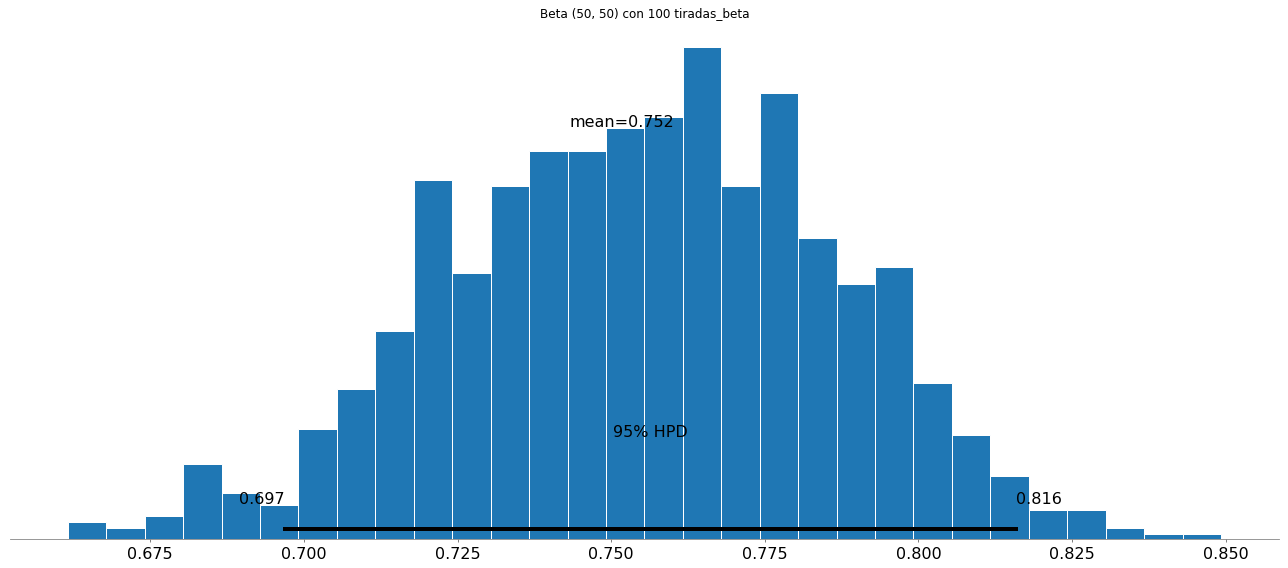

In [12]:
model, trace = model_and_trace(50, 100)
with model:
    pm.plot_posterior(trace)

En el caso de que sospechásemos de esta, los parámetros de Beta serían muy inferiores, aunque quizá sin llegar a una distribución uniforme. Consideremos $Beta(2, 2)$

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:01<00:00, 1314.60it/s]


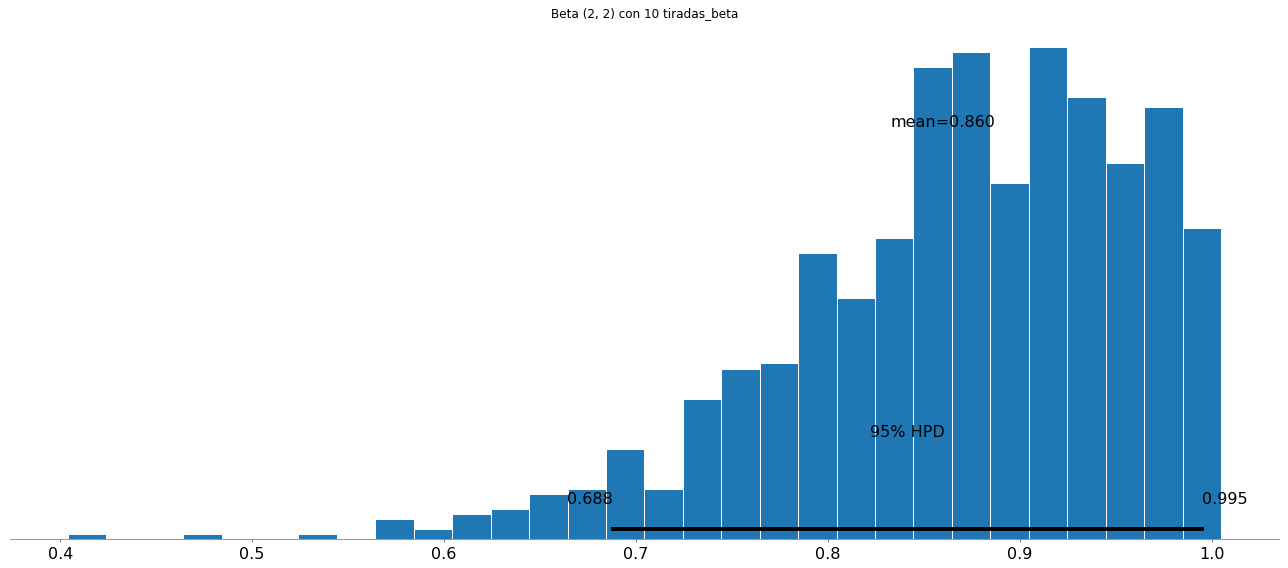

In [13]:
model, trace = model_and_trace(2, 10)
with model:
    pm.plot_posterior(trace)

En este caso, con sólo 10 tiradas ya tendríamos más certeza de que la moneda está cargada.